In [54]:
import matplotlib.pyplot as plt
import os
import numpy as np
import re
import glob
from py_scripts.fileio import *
from py_scripts.data import *

In [55]:
def Calc_n(omega,reG,T,points=20):

    omegal=omega[-points:]
    reGl=reG[-points:]

    def func(t,a,b):

            return a/(t**2+b**2)
    x=omegal
    y=reGl

    from scipy.optimize import curve_fit
    popt, pcov = curve_fit(func, x, y)
    
    A=popt[0]
    C=popt[1]
    
    #print A,C
    
    n=0
    
    n+=np.sum(reG)*2*T
    #print "sumre: ",n
    n+=A/C*(np.cosh(C/T)/np.sinh(C/T)-0.5*np.cosh(C/T/2)/np.sinh(C/T/2))-T*np.sum(2*A/(omega**2+C**2))
    #print "+tail: ",n
    n+=0.5
    
    return n

def Calc_n2(omega,reG,T,points=40):

    omegal=omega[-points:]
    reGl=reG[-points:]

    def func(t,a,b,c):

            return a/t**2+b/t**4+c/t**6
    x=omegal
    y=reGl

    from scipy.optimize import curve_fit
    popt, pcov = curve_fit(func, x, y)
    
    #print popt
    
    n=0
    
    n+=np.sum(reG)*2*T
    #print "sumre: ",n
    from scipy.special import zeta
    for k in xrange(len(popt)):
        n+=2*T*popt[k]*((1.-1./4**(k+1))*zeta(2*k+2)/(np.pi**(2*k+2)*T**(2*k+2))-np.sum(1/omega**(2*k+2)))
    #print "+tail: ",n
    n+=0.5
    
    return n

def Calc_n3(omega,reG,T,points=40):

    omegal=omega[-points:]
    reGl=reG[-points:]

    def func(t,a,b,c):

            return a/t**2+b/t**4+c/t**6
    x=omegal
    y=reGl

    from scipy.optimize import curve_fit
    popt, pcov = curve_fit(func, x, y)
    
    #print popt
    
    n=0
    
    n+=np.sum(reG)*2*T
    #print "sumre: ",n
    for k in xrange(len(popt)):
        om=(2*300+1)*np.pi*T
        n+=popt[k]/om**(2*k+1)/(2*k+1)/np.pi
    #print "+tail: ",n
    n+=0.5
    
    return n

ntot (avg) : 0.979273 , (std) : 0.000000
nf =  0.9539551992439202
ntot (avg) : 0.978147 , (std) : 0.001126
nf =  0.9525933892702259
ntot (avg) : 0.971351 , (std) : 0.009655
nf =  0.9312945865282135
ntot (avg) : 0.974746 , (std) : 0.010223
nf =  0.9604621097041931
ntot (avg) : 0.974539 , (std) : 0.009153
nf =  0.9490626810923074
ntot (avg) : 0.976530 , (std) : 0.009467
nf =  0.9621884662310644
ntot (avg) : 0.977199 , (std) : 0.008916
nf =  0.9571972740937882


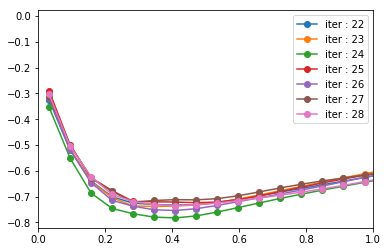

In [369]:
#U=0.5
ntot_list = []

for it in np.arange(22,29):
    T=0.01
    t=0.5
    #prefix = os.path.join("results","CT","T.%.04f"%T,"Metal","t.%.04f"%t,"converged")
    prefix = os.path.join("run")
    #T=0.01
    beta = 1/T

    fGf = os.path.join(prefix,"Gf.out.%d"%it)
    omega,reGf,imGf = np.loadtxt(fGf).T

    fGc = os.path.join(prefix,"Gc.out.%d"%it)
    omega,reGc,imGc = np.loadtxt(fGc).T

    fDeltaf = os.path.join(prefix,"Delta.inp")
    omega,reDeltaf,imDeltaf = np.loadtxt(fDeltaf).T


    fSig = os.path.join(prefix,"Sig.out.%d"%it)
    omega,reSig,imSig = np.loadtxt(fSig).T


    nf = Calc_n(omega,reGf,T)*2
    nc = Calc_n(omega,reGc,T)*2
    #nf2 = Calc_n2(omega,reGf,T)*2
    #nc2 = Calc_n2(omega,reGc,T)*2
    #nf3 = Calc_n3(omega,reGf,T)*2
    #nc3 = Calc_n3(omega,reGc,T)*2
    
    ntot_list.append(nf+nc)
    if it>10:
        try:
            print "ntot (avg) : %f , (std) : %f"%(np.average(ntot_list[-10:]),np.std(ntot_list[-10:]))
        except:
            print ""

    print "nf = ",nf
    #print "nc = ",nc
    #print "n = ",nf+nc

    #print "nf2 = ",nf2
    #print "nc2 = ",nc2
    #print "n2 = ",nf2+nc2
    
    #print "nf3 = ",nf3
    #print "nc3 = ",nc3
    #print "n3 = ",nf3+nc3
    om=300
    """
    plt.plot(omega,imGf,'-o',label='iter : %d'%(it))
    plt.legend()
    plt.xlim(0,om)
    pfile = os.path.join(prefix,"plots","imGf.png")
    #plt.savefig(pfile)
    plt.show()

    plt.plot(omega,imGc,'-o',label='iter : %d'%(it))
    plt.legend()
    plt.xlim(0,om)
    pfile = os.path.join(prefix,"plots","imGc.png")
    #plt.savefig(pfile)
    plt.show()

    plt.plot(omega,reDeltaf,'-o',label='iter : %d'%(it))
    plt.legend()
    plt.xlim(0,om)
    pfile = os.path.join(prefix,"plots","imGc.png")
    #plt.savefig(pfile)
    plt.show()
    """
    plt.plot(omega,imSig,'-o',label='iter : %d'%(it))
    plt.legend()
    plt.xlim(0,1)
    pfile = os.path.join(prefix,"plots","imGc.png")
    #plt.savefig(pfile)
plt.show()


## Convergence Monitoring

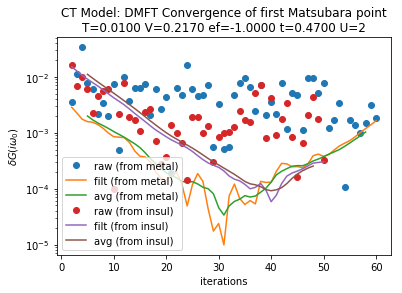

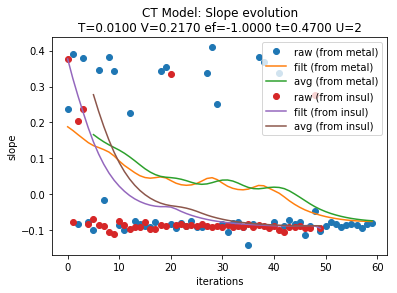

In [278]:
T=0.01
t=0.47
V=0.217
ef=-1

prefix = os.path.join("results","CT","T.%.04f"%T,"Metal","t.%.04f"%t,"converged")
#prefix = os.path.join("run")

iters,diffs = np.loadtxt(os.path.join(prefix,"diff.iter")).T

plt.plot(iters,abs(diffs),'o',label='raw (from metal)')

iters,diffs = np.loadtxt(os.path.join(prefix,"diff.filt.iter")).T

plt.plot(iters,abs(diffs),'-',label='filt (from metal)')

iters,diffs,std = paverage(abs(diffs))

plt.plot(iters,diffs,'-',label='avg (from metal)')

prefix = os.path.join("results","CT","T.%.04f"%T,"Insul","t.%.04f"%t,"converged")
#prefix = os.path.join("run")

iters,diffs = np.loadtxt(os.path.join(prefix,"diff.iter")).T

plt.plot(iters,abs(diffs),'o',label='raw (from insul)')

iters,diffs = np.loadtxt(os.path.join(prefix,"diff.filt.iter")).T

plt.plot(iters,abs(diffs),'-',label='filt (from insul)')

iters,diffs,std = paverage(abs(diffs))

plt.plot(iters,diffs,'-',label='avg (from insul)')

plt.yscale("log")
plt.ylabel("$\delta$$G(i\omega_{0})$")
plt.xlabel("iterations")
plt.title("CT Model: DMFT Convergence of first Matsubara point\nT=%.04f V=%.04f ef=%.04f t=%.04f U=2"%(T,V,ef,t))
plt.legend()
plt.show()

prefix = os.path.join("results","CT","T.%.04f"%T,"Metal","t.%.04f"%t,"converged")

iters_slope,slopes = np.loadtxt(os.path.join(prefix,"slope.iter")).T

plt.plot(iters_slope,slopes,'o',label='raw (from metal)')

iters_slope,slopes = np.loadtxt(os.path.join(prefix,"slope.filt.iter")).T

plt.plot(iters_slope,slopes,'-',label='filt (from metal)')

iters_slope,slopes,std = paverage(slopes)

plt.plot(iters_slope,slopes,'-',label='avg (from metal)')

prefix = os.path.join("results","CT","T.%.04f"%T,"Insul","t.%.04f"%t,"converged")

iters_slope,slopes = np.loadtxt(os.path.join(prefix,"slope.iter")).T

plt.plot(iters_slope,slopes,'o',label='raw (from insul)')

iters_slope,slopes = np.loadtxt(os.path.join(prefix,"slope.filt.iter")).T

plt.plot(iters_slope,slopes,'-',label='filt (from insul)')

iters_slope,slopes,std = paverage(slopes)

plt.plot(iters_slope,slopes,'-',label='avg (from insul)')
#plt.yscale("log")
plt.ylabel("slope")
plt.xlabel("iterations")
plt.title("CT Model: Slope evolution\nT=%.04f V=%.04f ef=%.04f t=%.04f U=2"%(T,V,ef,t))
plt.legend()
plt.show()

IOError: results/CT/T.0.0100/Insul/t.0.3500/converged/slope.iter not found.

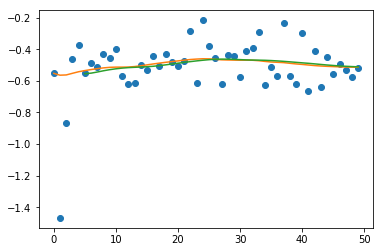

In [361]:
T=0.01
t=0.35

prefix = os.path.join("results","CT","T.%.04f"%T,"Metal","t.%.04f"%t,"converged")

iters_slope,slopes = np.loadtxt(os.path.join(prefix,"slope.iter")).T

plt.plot(iters_slope,slopes,'o',label='Metal (Raw)')

iters_slope,slopes = np.loadtxt(os.path.join(prefix,"slope.filt.iter")).T

plt.plot(iters_slope,slopes,'-',label='Metal (Filt)')

iters_slope,slopes,std = paverage(slopes)

plt.plot(iters_slope,slopes,'-',label='Metal (Avg)')


prefix = os.path.join("results","CT","T.%.04f"%T,"Insul","t.%.04f"%t,"converged")

iters_slope,slopes = np.loadtxt(os.path.join(prefix,"slope.iter")).T

plt.plot(iters_slope,slopes,'o',label='Insulator (Raw)')

iters_slope,slopes = np.loadtxt(os.path.join(prefix,"slope.filt.iter")).T

plt.plot(iters_slope,slopes,'-',label='Insulator (Filt)')

iters_slope,slopes,std = paverage(slopes)

plt.plot(iters_slope,slopes,'-',label='Insulator (Avg)')

plt.ylabel("slope")
plt.xlabel("iterations")
plt.title("CT Model: Slope evolution")
plt.legend()
plt.show()

## mu vs t

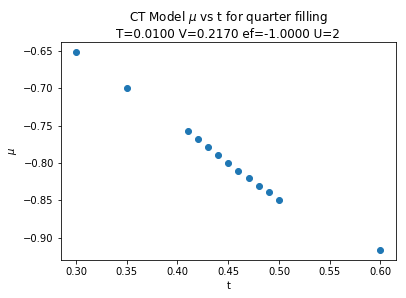

In [370]:
T=0.01
ef=-1
t_list = [0.3,0.35,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.6]
mu_list = []
for t in t_list:

    SPATH="CT/T.%.04f/%s/t.%.04f/converged/"%(T,'Metal',t)
    #Read in mu
    f = open(os.path.join("results/",SPATH,"PARAMS"), "r")
    contents = f.read()
    f. close()
    char = re.findall(r"mu [-+]?\d+\.\d+", contents)
    mu = float(char[0][3:])+ef
    mu_list.append(mu)
    
plt.plot(t_list,mu_list,'o')
plt.xlabel("t")
plt.ylabel("$\mu$")
plt.title("CT Model $\mu$ vs t for quarter filling\nT=%.04f V=%.04f ef=%.04f U=2"%(T,V,ef))
plt.show()

## n vs mu

['results/CT/T.0.0100/Metal/t.0.3000/mu.-0.6563', 'results/CT/T.0.0100/Metal/t.0.3000/mu.-0.7573', 'results/CT/T.0.0100/Metal/t.0.3000/mu.-0.6527', 'results/CT/T.0.0100/Metal/t.0.3000/mu.-0.6518', 'results/CT/T.0.0100/Metal/t.0.3000/mu.-0.6508', 'results/CT/T.0.0100/Metal/t.0.3000/mu.-0.6345', 'results/CT/T.0.0100/Metal/t.0.3000/mu.-0.6617', 'results/CT/T.0.0100/Metal/t.0.3000/mu.-0.7073', 'results/CT/T.0.0100/Metal/t.0.3000/mu.-0.6073']


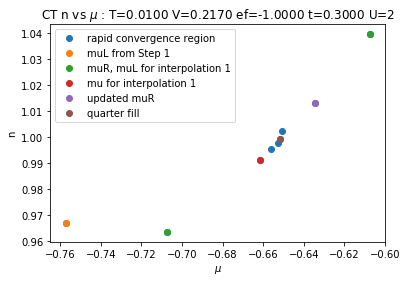

In [337]:
T=0.01
typ = 'Metal'
t = 0.3
ef=-1

SPATH="CT/T.%.04f/%s/t.%.04f/"%(T,typ,t)

f_list = glob.glob(os.path.join("results",SPATH,"mu.*"))
mu_list = []
print f_list
n_list = []

for path in f_list:
    f = open(os.path.join(path,"PARAMS"), "r")
    contents = f.read()
    f. close()
    char = re.findall(r"mu [-+]?\d+\.\d+", contents)
    mu = float(char[0][3:])+ef
    mu_list.append(mu)
    
    f = open(os.path.join(path,"occupation.out"), "r")
    contents = f.read()
    f. close()
    char = re.findall(r"[-+]?\d+\.\d+", contents)
    n = float(char[0])
    n_list.append(n)

#print mu_list

plt.plot(np.array(mu_list),(np.array(n_list)*2),'o',label = 'rapid convergence region')
plt.plot(mu_list[1],(np.array(n_list)*2)[1],'o',label = 'muL from Step 1')
#plt.plot(mu_list[-2],(np.array(n_list)*2)[-2],'o',label = 'muR from Step 1')
#plt.plot(mu_list[-1],(np.array(n_list)*2)[-1],'o',label = 'muR from Step 2')
plt.plot(mulin1,nlin1,'o',label = 'muR, muL for interpolation 1')
plt.plot(mu_list[-3],(np.array(n_list)*2)[-3],'o',label = 'mu for interpolation 1')
plt.plot(mu_list[-4],(np.array(n_list)*2)[-4],'o',label = 'updated muR')
plt.plot(mu_list[3],(np.array(n_list)*2)[3],'o',label = 'quarter fill')
plt.title("CT n vs $\mu$ : T=%.04f V=%.04f ef=%.04f t=%.04f U=2"%(T,V,ef,t))
plt.legend()
plt.xlabel("$\mu$")
plt.ylabel("n")
plt.show()

['results/CT/T.0.0100/Metal/t.0.3500/mu.-0.6901', 'results/CT/T.0.0100/Metal/t.0.3500/mu.-0.6992', 'results/CT/T.0.0100/Metal/t.0.3500/mu.-0.7573', 'results/CT/T.0.0100/Metal/t.0.3500/mu.-0.6912', 'results/CT/T.0.0100/Metal/t.0.3500/mu.-0.6729', 'results/CT/T.0.0100/Metal/t.0.3500/mu.-0.7073', 'results/CT/T.0.0100/Metal/t.0.3500/mu.-0.6073']
[-0.690109, -0.6992430000000001, -0.757298, -0.691188, -0.672921, -0.707298, -0.607298]
[0.501368, 0.499116, 0.479562, 0.501392, 0.509827, 0.494275, 0.539014]


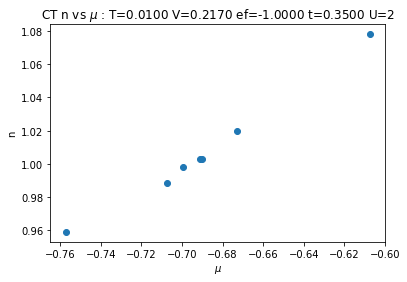

In [359]:
T=0.01
typ = 'Metal'
t = 0.35
ef=-1

SPATH="CT/T.%.04f/%s/t.%.04f/"%(T,typ,t)

f_list = glob.glob(os.path.join("results",SPATH,"mu.*"))
mu_list = []
print f_list
n_list = []

for path in f_list:
    f = open(os.path.join(path,"PARAMS"), "r")
    contents = f.read()
    f. close()
    char = re.findall(r"mu [-+]?\d+\.\d+", contents)
    mu = float(char[0][3:])+ef
    mu_list.append(mu)
    
    f = open(os.path.join(path,"occupation.out"), "r")
    contents = f.read()
    f. close()
    char = re.findall(r"[-+]?\d+\.\d+", contents)
    n = float(char[0])
    n_list.append(n)

print mu_list
print n_list

plt.plot(np.array(mu_list),(np.array(n_list)*2),'o',label = '')
plt.title("CT n vs $\mu$ : T=%.04f V=%.04f ef=%.04f t=%.04f U=2"%(T,V,ef,t))
#plt.legend()

plt.xlabel("$\mu$")
plt.ylabel("n")
plt.show()

['results/CT/T.0.0100/Metal/t.0.3500/mu.-0.6901', 'results/CT/T.0.0100/Metal/t.0.3500/mu.-0.6992', 'results/CT/T.0.0100/Metal/t.0.3500/mu.-0.7573', 'results/CT/T.0.0100/Metal/t.0.3500/mu.-0.6912', 'results/CT/T.0.0100/Metal/t.0.3500/mu.-0.6729', 'results/CT/T.0.0100/Metal/t.0.3500/mu.-0.7073', 'results/CT/T.0.0100/Metal/t.0.3500/mu.-0.6073']


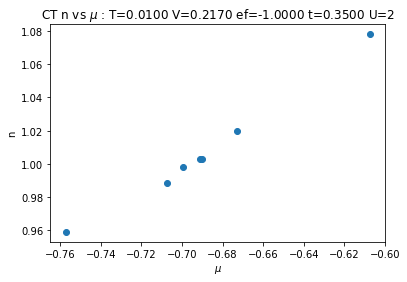

In [340]:
T=0.01
typ = 'Metal'
t = 0.35
ef=-1

SPATH="CT/T.%.04f/%s/t.%.04f/"%(T,typ,t)

f_list = glob.glob(os.path.join("results",SPATH,"mu.*"))
mu_list = []
print f_list
n_list = []

for path in f_list:
    f = open(os.path.join(path,"PARAMS"), "r")
    contents = f.read()
    f. close()
    char = re.findall(r"mu [-+]?\d+\.\d+", contents)
    mu = float(char[0][3:])+ef
    mu_list.append(mu)
    
    f = open(os.path.join(path,"occupation.out"), "r")
    contents = f.read()
    f. close()
    char = re.findall(r"[-+]?\d+\.\d+", contents)
    n = float(char[0])
    n_list.append(n)

#print mu_list

plt.plot(np.array(mu_list),(np.array(n_list)*2),'o',label = '')
plt.title("CT n vs $\mu$ : T=%.04f V=%.04f ef=%.04f t=%.04f U=2"%(T,V,ef,t))
#plt.legend()

plt.xlabel("$\mu$")
plt.ylabel("n")
plt.show()

In [321]:
mulin1 = [mu_list[-2],mu_list[-1]]
nlin1 = [n_list[-2]*2,n_list[-1]*2]

In [335]:
mu_list

[-0.690109,
 -0.6992430000000001,
 -0.757298,
 -0.691188,
 -0.672921,
 -0.707298,
 -0.607298]

In [336]:
n_list

[0.501368, 0.499116, 0.479562, 0.501392, 0.509827, 0.494275, 0.539014]

## Lambda Analysis

lambda =  -0.07191404235643639


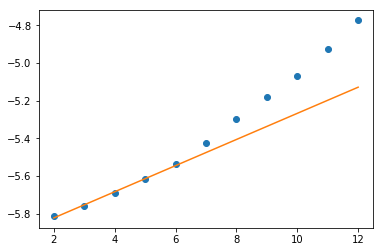

In [43]:
begin=0
end = 5

y=np.log(abs(diffs))[begin:end]
x=iters[begin:end]
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y,rcond=None)[0]

lamb = 1-np.exp(m)

print "lambda = ",lamb

fit_x = iters
fit_y = m*fit_x + c

plt.plot(iters,np.log(abs(diffs)),'o')
plt.plot(fit_x,fit_y)
plt.show()

-0.7425916124721268 -0.02857437767064097
-0.7424620465892965 -48.50738426486556


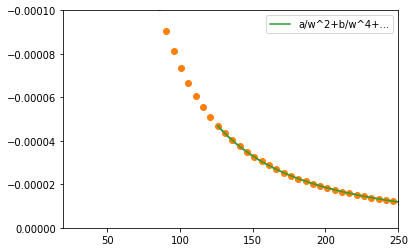

In [154]:
points=50
def func(t,a,b):

        return a/(t**2+b**2)
    
x=omega[-points:]
y=reGf[-points:]

from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x, y)

A=popt[0]
C=popt[1]

print A,C

omnl = (omega[-1]/np.pi/T-1)/2

ome = np.arange((omnl+1)/5,(omnl+1)*2)
omex = (2*ome+1)*np.pi*T

reGfex = func(omex,popt[0],popt[1])

#plt.plot(omega[0::8],reGf[0::8],'o')
plt.plot(omex,reGfex)
plt.xlim(20,250)
plt.ylim(0,-0.001)
#plt.show()

points=50
def func(t,a,b,c):

        return a/t**2 + b/t**4 + c/t**6
    
x=omega[-points:]
y=reGf[-points:]

from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x, y)

A=popt[0]
C=popt[1]

print A,C

omnl = (omega[-1]/np.pi/T-1)/2

ome = np.arange((omnl+1)/5,(omnl+1)*2)
omex = (2*ome+1)*np.pi*T

reGfex = func(omex,popt[0],popt[1],popt[2])

plt.plot(omega[0::8],reGf[0::8],'o')
plt.plot(omex,reGfex,label='a/w^2+b/w^4+...')
#plt.xlim(200,250)
plt.ylim(0,-0.0001)
plt.legend()
plt.show()

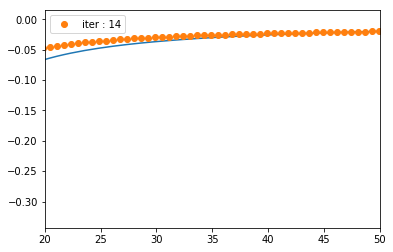

In [181]:
def func(t,a,b,c):

        return a/t+b/t**3+c/t**5
    
x=omega[-20:]
y=imSig[-20:]

from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x, y)

omnl = (omega[-1]/np.pi/T-1)/2

#ome = np.arange((omnl+1)/2,(omnl+1)*2)
ome = np.arange(30,200)
omex = (2*ome+1)*np.pi*T

imSigex = func(omex,popt[0],popt[1],popt[2])

plt.plot(omex,imSigex)
plt.plot(omega,imSig,'o',label='iter : %d'%(it))
plt.legend()
plt.xlim(20,50)
pfile = os.path.join(prefix,"plots","imGc.png")
#plt.savefig(pfile)
plt.show()


## Evolution of self energy vs t

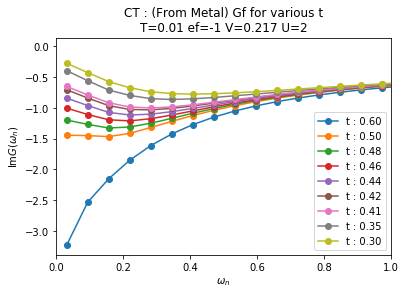

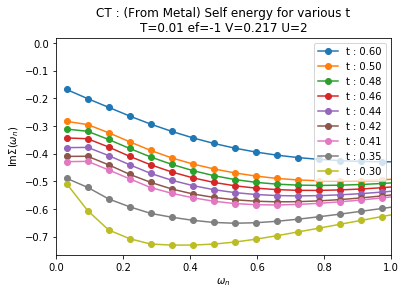

In [362]:
T=0.01
#t=0.41
for t in [0.6,0.5,0.48,0.46,0.44,0.42,0.41,0.35,0.3]:
    prefix = os.path.join("results","CT","T.%.04f"%T,"Metal","t.%.04f"%t,"converged")

    #it=49
    om=1
    fGf = os.path.join(prefix,"Gf.out")
    Gf = np.loadtxt(fGf).T
    plt.plot(np.hstack((Gf[0])),np.hstack((Gf[2])),'-o',label='t : %.02f'%(t))
    plt.legend()
    plt.xlim(0,om)
    pfile = os.path.join(prefix,"plots","imG.png")
    #plt.savefig(pfile)
    #plt.show()
"""
    fGc = os.path.join(prefix,"Gc.out")
    Gc = np.loadtxt(fGc).T
    plt.plot(np.hstack((Gc[0])),np.hstack((Gc[2])),'-o',label='iter : %d'%(it))
    plt.legend()
    plt.xlim(0,om)
    pfile = os.path.join(prefix,"plots","imG.png")
    #plt.savefig(pfile)
    plt.show()
    """

"""    fGf = os.path.join(prefix,"Sig.out")
    Gf = np.loadtxt(fGf).T
    plt.plot(np.hstack((Gf[0])),np.hstack((Gf[2])),'-',label='t : %.02f'%(t))
    plt.legend()
    plt.xlim(0,om)
    pfile = os.path.join(prefix,"plots","imSig.png")"""
    #plt.savefig(pfile)
plt.ylabel("Im$G(\omega_{n})$")
#plt.ylabel("Im$\Sigma(\omega_{n})$")
plt.xlabel("$\omega_{n}$")
plt.title("CT : (From Metal) Gf for various t\nT=0.01 ef=-1 V=0.217 U=2")
plt.show()


for t in [0.6,0.5,0.48,0.46,0.44,0.42,0.41,0.35,0.3]:
    prefix = os.path.join("results","CT","T.%.04f"%T,"Metal","t.%.04f"%t,"converged")

    om=1

    fGf = os.path.join(prefix,"Sig.out")
    Gf = np.loadtxt(fGf).T
    plt.plot(np.hstack((Gf[0])),np.hstack((Gf[2])),'-o',label='t : %.02f'%(t))
    plt.legend()
    plt.xlim(0,om)
    pfile = os.path.join(prefix,"plots","imSig.png")
    #plt.savefig(pfile)

plt.ylabel("Im$\Sigma(\omega_{n})$")
plt.xlabel("$\omega_{n}$")
plt.title("CT : (From Metal) Self energy for various t\nT=0.01 ef=-1 V=0.217 U=2")
plt.show()


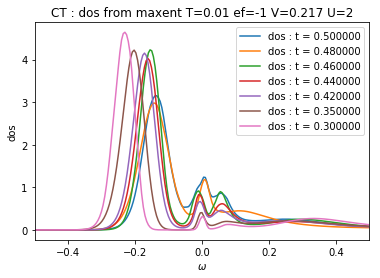

In [354]:
T=0.01


for t in [0.5,0.48,0.46,0.44,0.42,0.35,0.3]:
    prefix = os.path.join("results","CT","T.%.04f"%T,"Metal","t.%.04f"%t,"converged")


    fdos = os.path.join(prefix,"maxent","dos.out")
    omega,dos = np.loadtxt(fdos).T

    plt.plot(omega,dos,label = 'dos : t = %f'%t)




plt.xlim(-0.5,0.5)
plt.ylabel("dos")
plt.xlabel("$\omega$")
plt.title("CT : dos from maxent T=0.01 ef=-1 V=0.217 U=2")
plt.legend()
plt.show()